# CCA complete case analysis

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df=pd.read_csv('data_science_job.csv')

In [9]:
df.sample(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
11478,918,city_30,0.698,NaN,Has relevent experience,Part time course,Graduate,STEM,7.0,50-99,Pvt Ltd,12.0,0.0
1408,25613,city_160,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,9.0,<10,Pvt Ltd,104.0,0.0
12798,11362,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,17.0,NaN,NaN,11.0,1.0


In [36]:
#  percentage of missing data in each column
#  if less than 5% we drop the column

df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [13]:
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'training_hours', 'target'],
      dtype='object')

In [34]:
for x in df.columns:
    if df[x].isnull().mean() < 0.05 and df[x].isnull().mean() > 0:
        print(x)
    

city_development_index
enrolled_university
education_level
experience
training_hours


In [32]:
col = [x for x in df.columns if df[x].isnull().mean() < 0.05 and df[x].isnull().mean()]

In [33]:
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [35]:
dfdf[col].dropna()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0
...,...,...,...,...,...
19153,0.878,no_enrollment,Graduate,14.0,42.0
19154,0.920,no_enrollment,Graduate,14.0,52.0
19155,0.920,no_enrollment,Graduate,20.0,44.0
19156,0.802,no_enrollment,High School,0.0,97.0


In [37]:
len(df[col].dropna()) / len(df)

0.8968577095730244

In [ ]:
# 89 % remaining

In [38]:
new_df = df[col].dropna()

In [41]:
df.shape,new_df.shape

((19158, 13), (17182, 5))

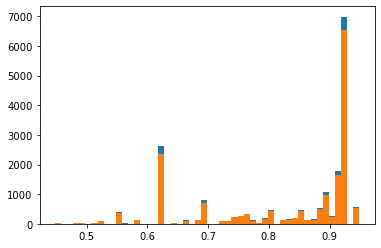

In [44]:
plt.hist(df['city_development_index'],bins= 50);
plt.hist(new_df['city_development_index'],bins= 50);

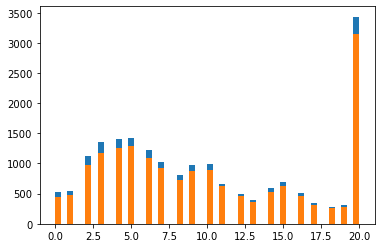

In [45]:
plt.hist(df['experience'],bins= 50);
plt.hist(new_df['experience'],bins= 50);

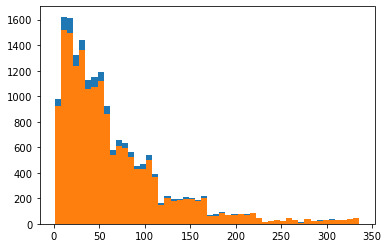

In [46]:
plt.hist(df['training_hours'],bins= 50);
plt.hist(new_df['training_hours'],bins= 50);

C:\Users\91777\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\91777\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


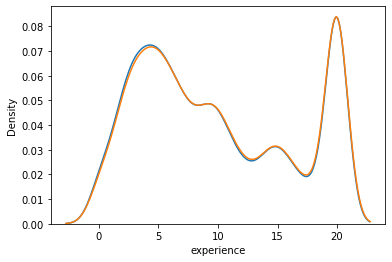

In [53]:
import seaborn as sns
sns.distplot(df['experience'],bins= 50,hist = False);
sns.distplot(new_df['experience'],bins= 50,hist = False);

In [54]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [60]:
a = df['enrolled_university'].value_counts() / len(df)
# new_df['enrolled_university'].value_counts() / len(df)

In [61]:
b = new_df['enrolled_university'].value_counts() / len(new_df)

In [63]:
(b-a)*100

no_enrollment       1.397492
Full time course    0.462726
Part time course    0.154606
Name: enrolled_university, dtype: float64

In [64]:
a

no_enrollment       0.721213
Full time course    0.196106
Part time course    0.062533
Name: enrolled_university, dtype: float64

In [65]:
b

no_enrollment       0.735188
Full time course    0.200733
Part time course    0.064079
Name: enrolled_university, dtype: float64

In [66]:
c = df['education_level'].value_counts()/ len(df)

In [68]:
d = new_df['education_level'].value_counts()/ len(new_df)

In [70]:
(d-c)*100

Graduate          1.444793
Masters           0.644881
High School       0.209743
Phd               0.050640
Primary School    0.051029
Name: education_level, dtype: float64